In [1]:
%matplotlib inline
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [2]:
font = {'family': 'Droid Sans',
        'weight': 'normal',
        'size': 13}
rc('font', **font)

In [3]:
from scipy.optimize import minimize_scalar

In [4]:
%load_ext autoreload
%autoreload 1

In [5]:
%aimport optim1d

In [6]:
%aimport test

In [7]:
optims = [minimize_scalar(f, bounds=(p['a'], p['b']), method='Bounded')['fun'] for f, p in zip(test.fun, test.ans)]

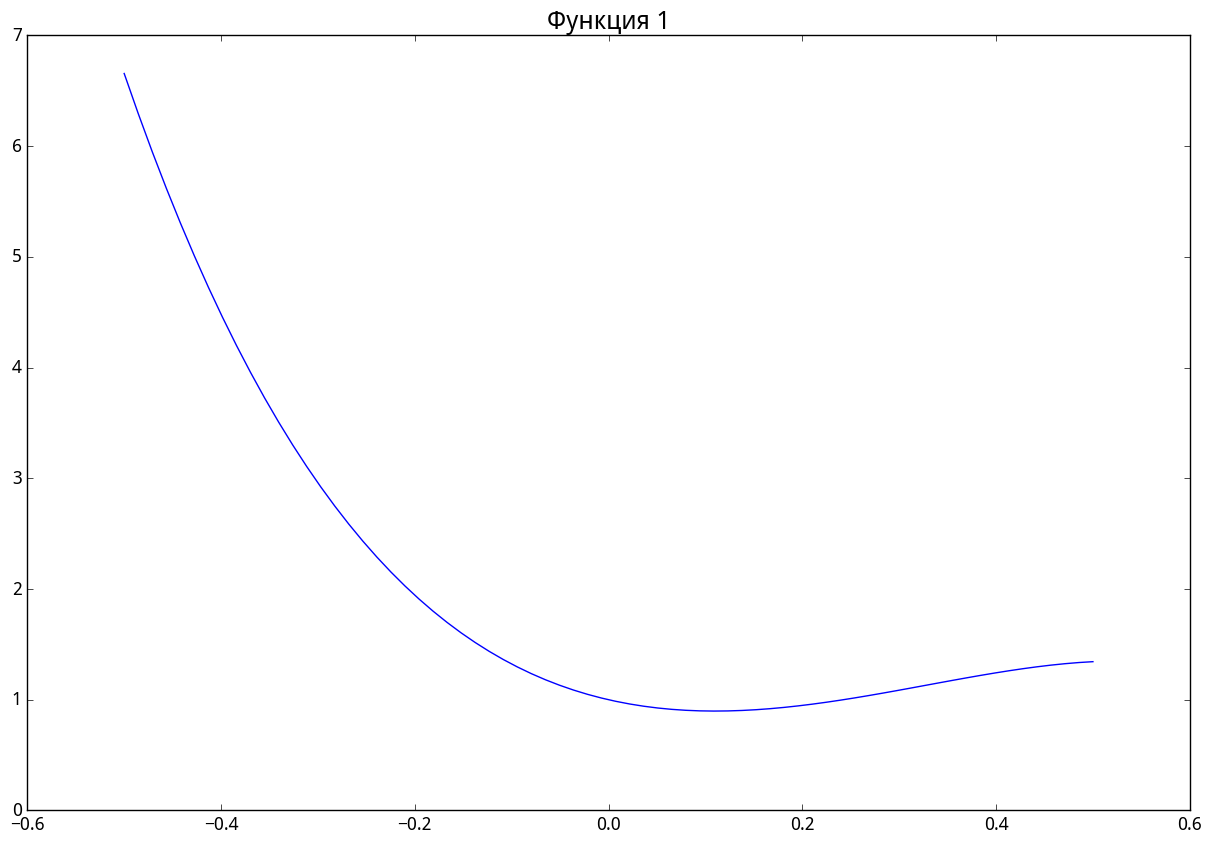

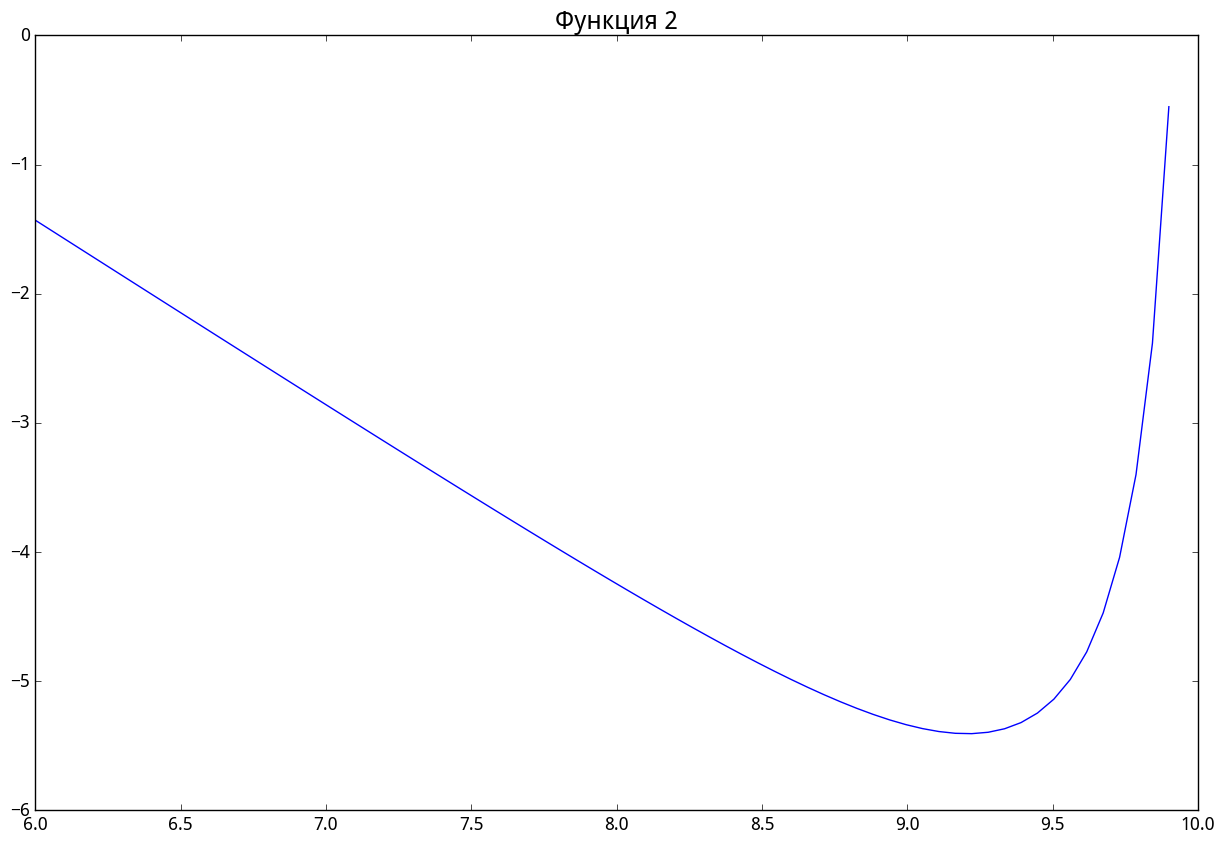

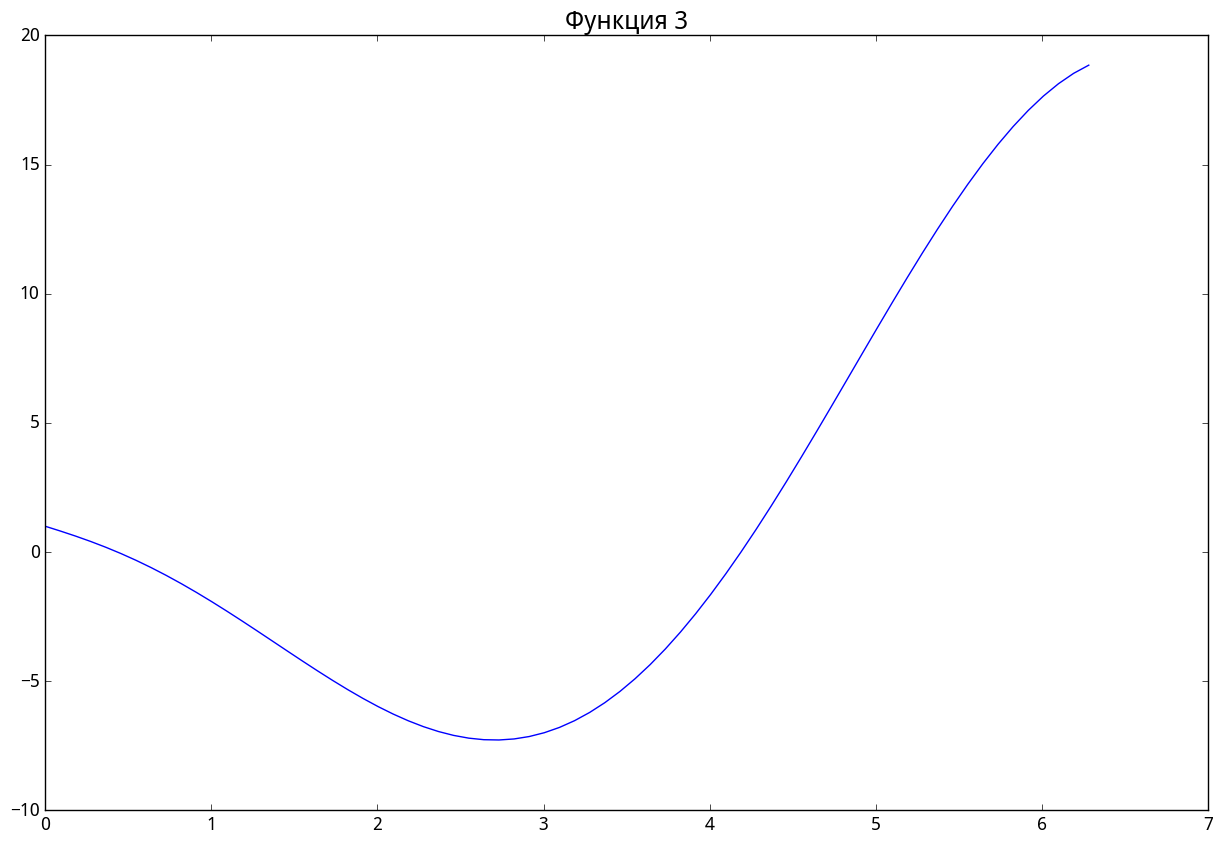

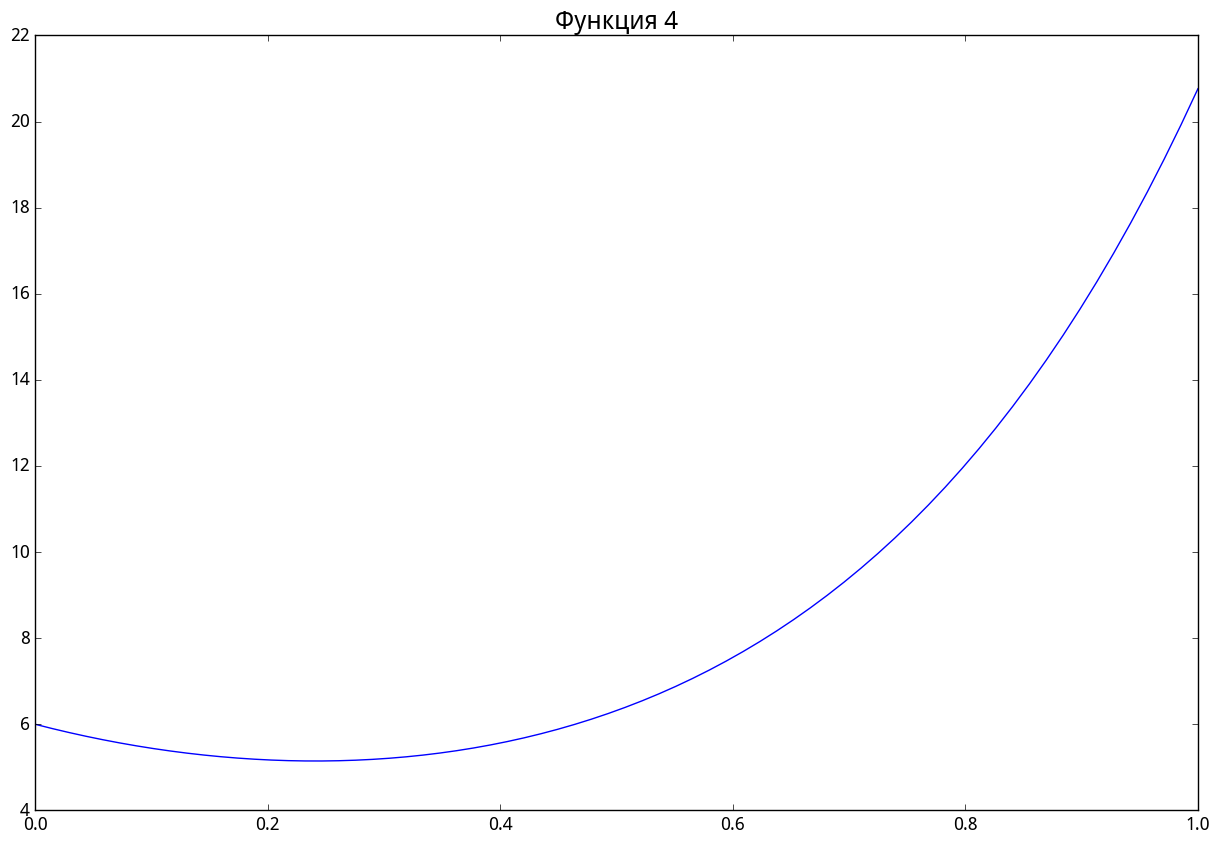

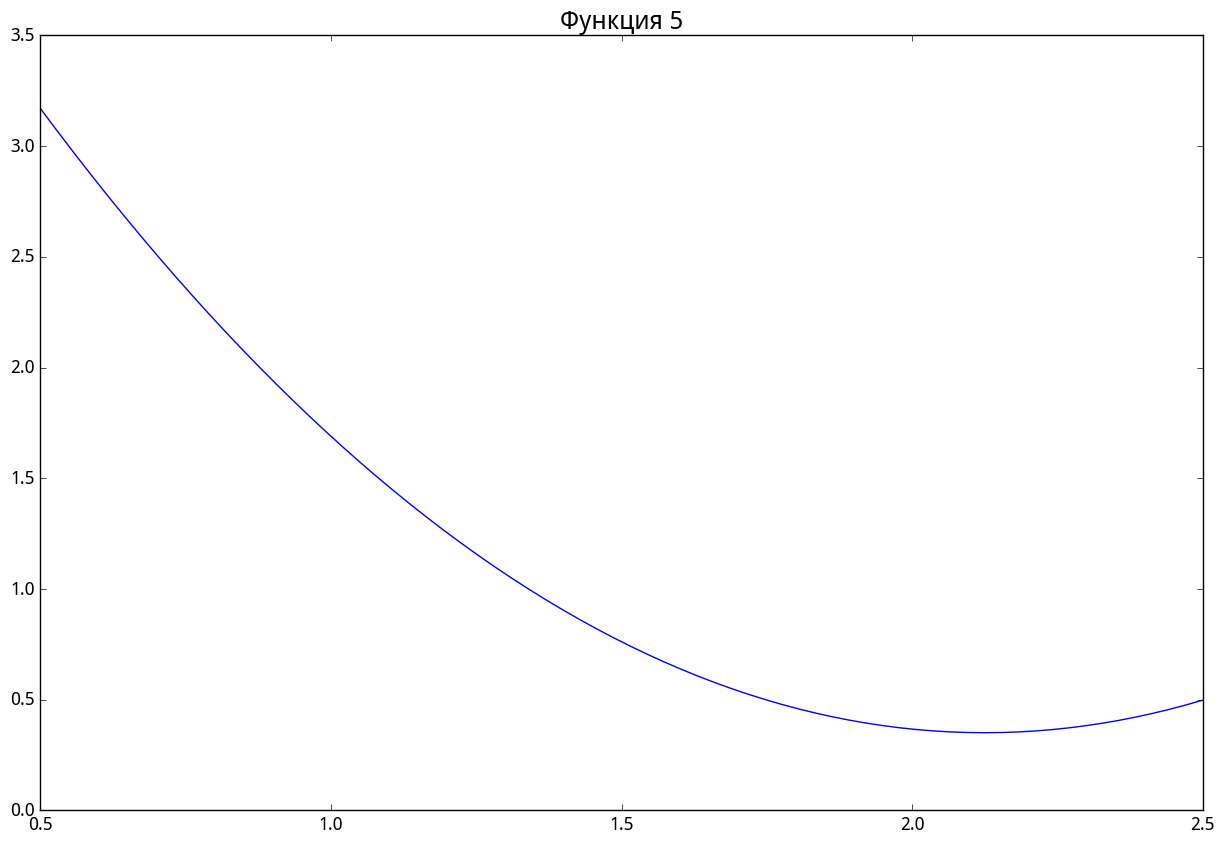

In [37]:
for i, (f, p) in enumerate(zip(test.fun, test.ans)):
    x = np.linspace(p['a'], p['b'], 70)
    
    plt.figure(figsize=(15, 10))
    plt.title('Функция ' + str(i + 1), fontsize=18)
    plt.plot(x, f(x))
    plt.show()

In [84]:
my_optims = []
for f, p in zip(test.fun, test.ans):
    mo = []
    tmp = optim1d.min_golden(f, p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_parabolic(f, p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_brent(f, p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    my_optims.append(mo)

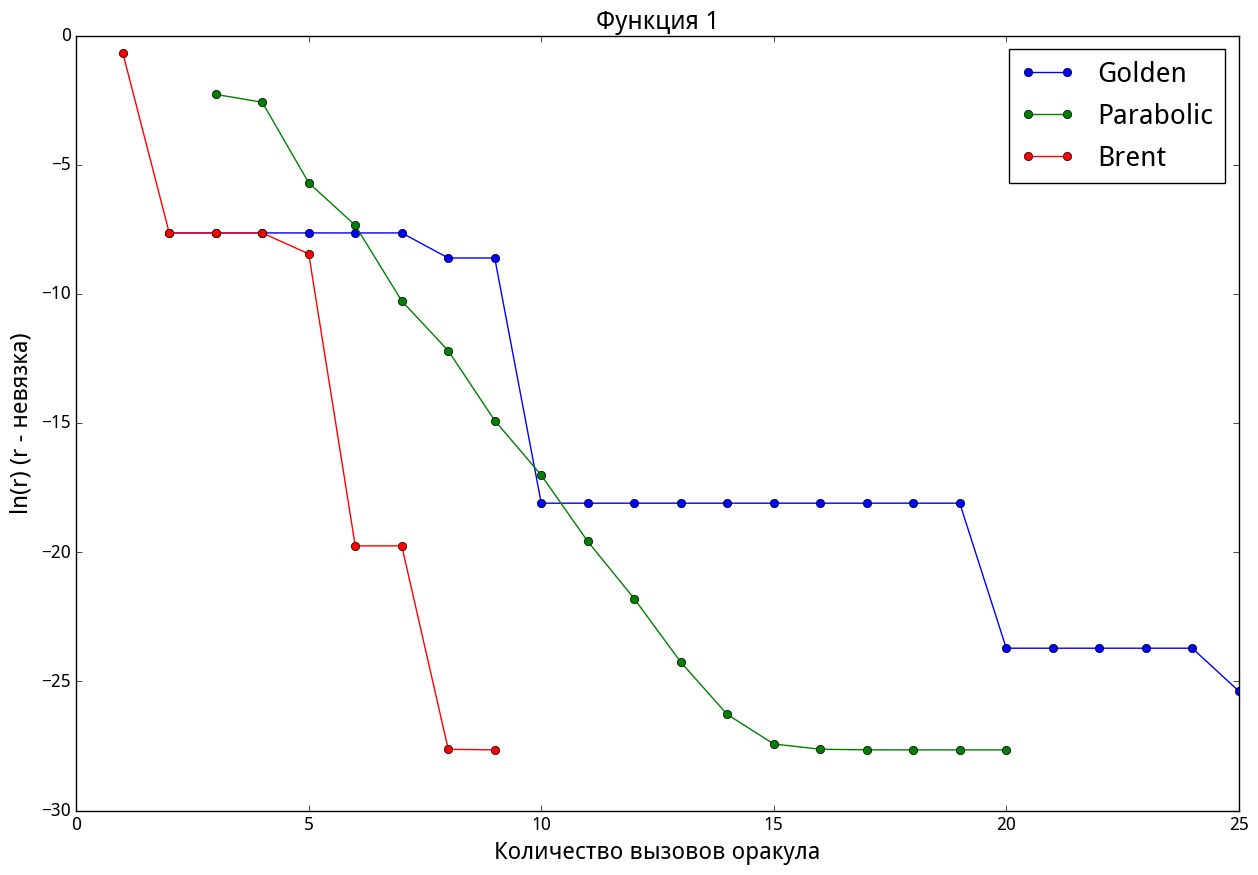

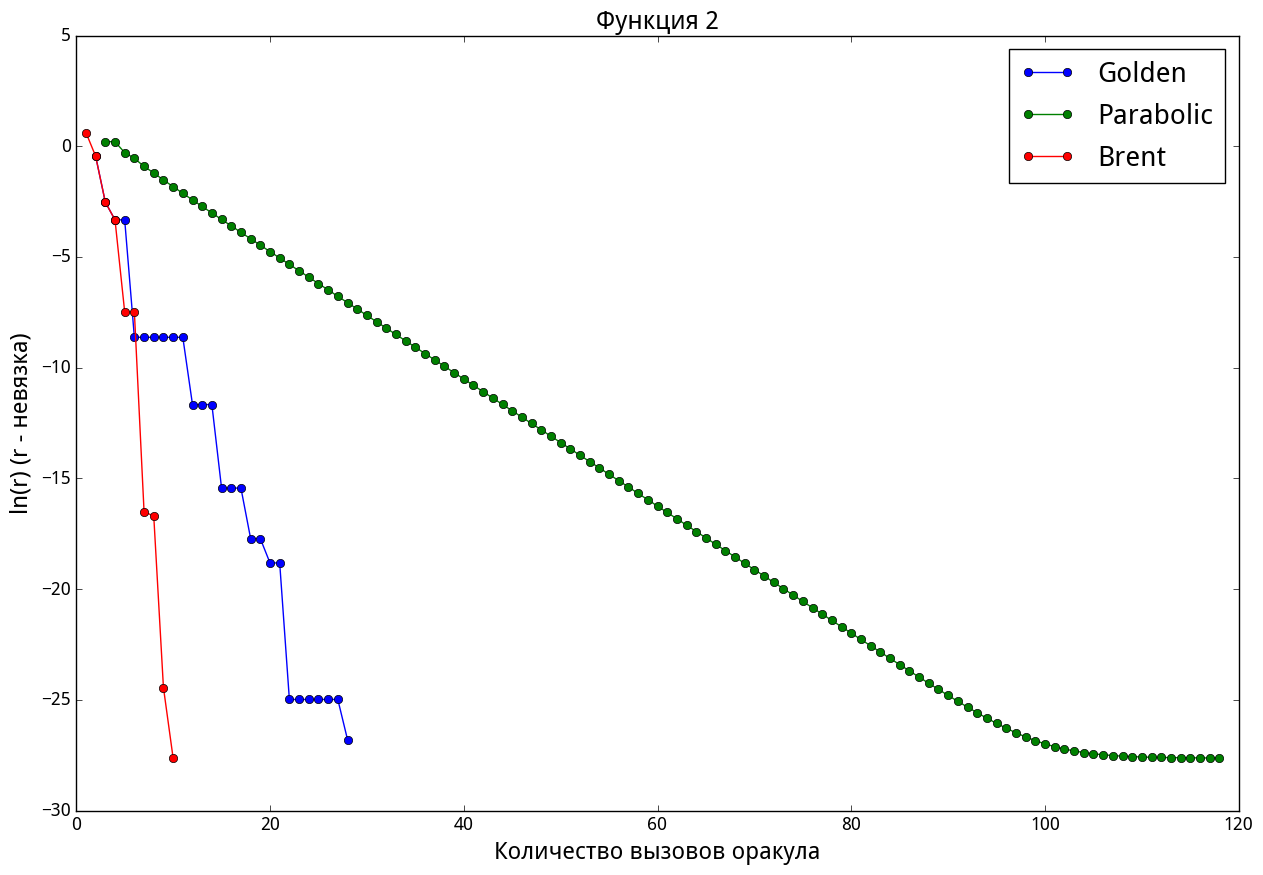

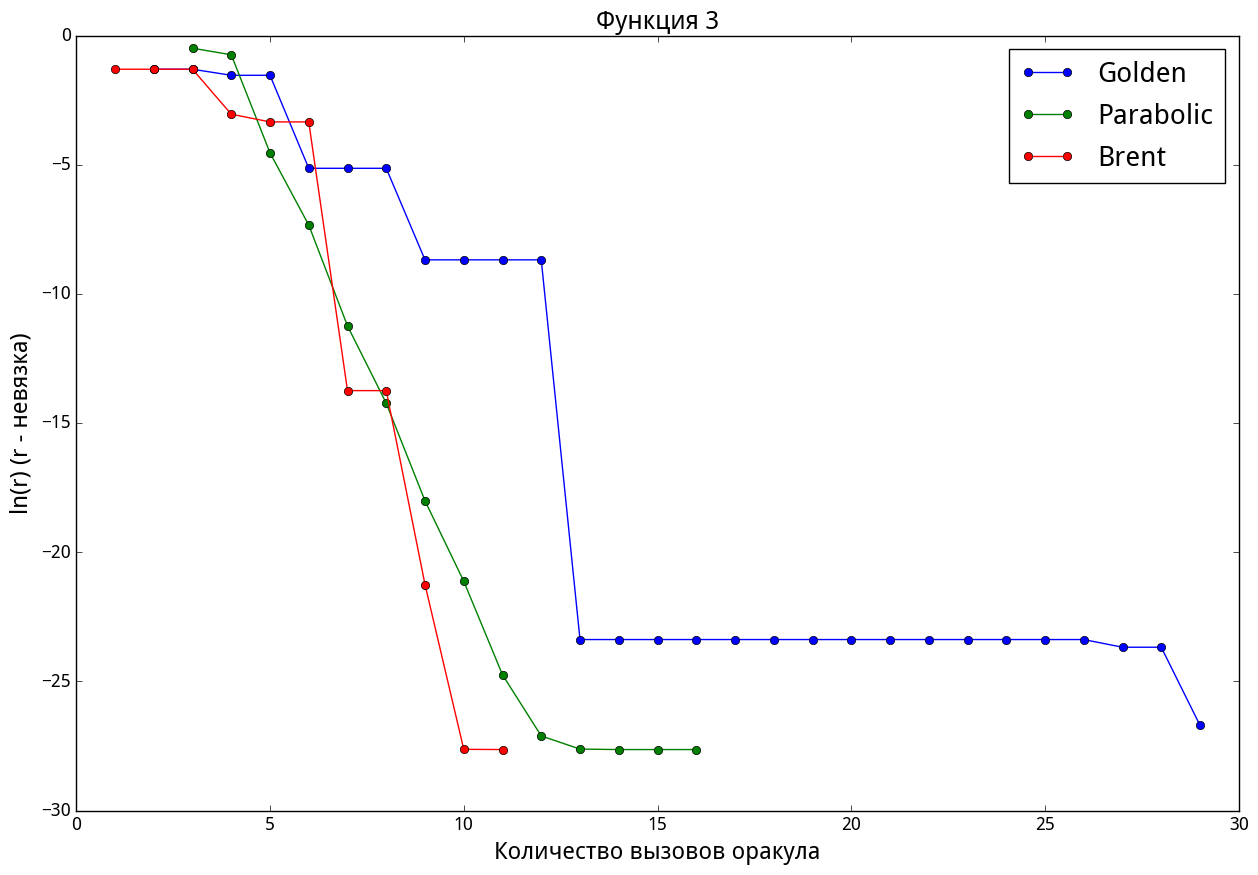

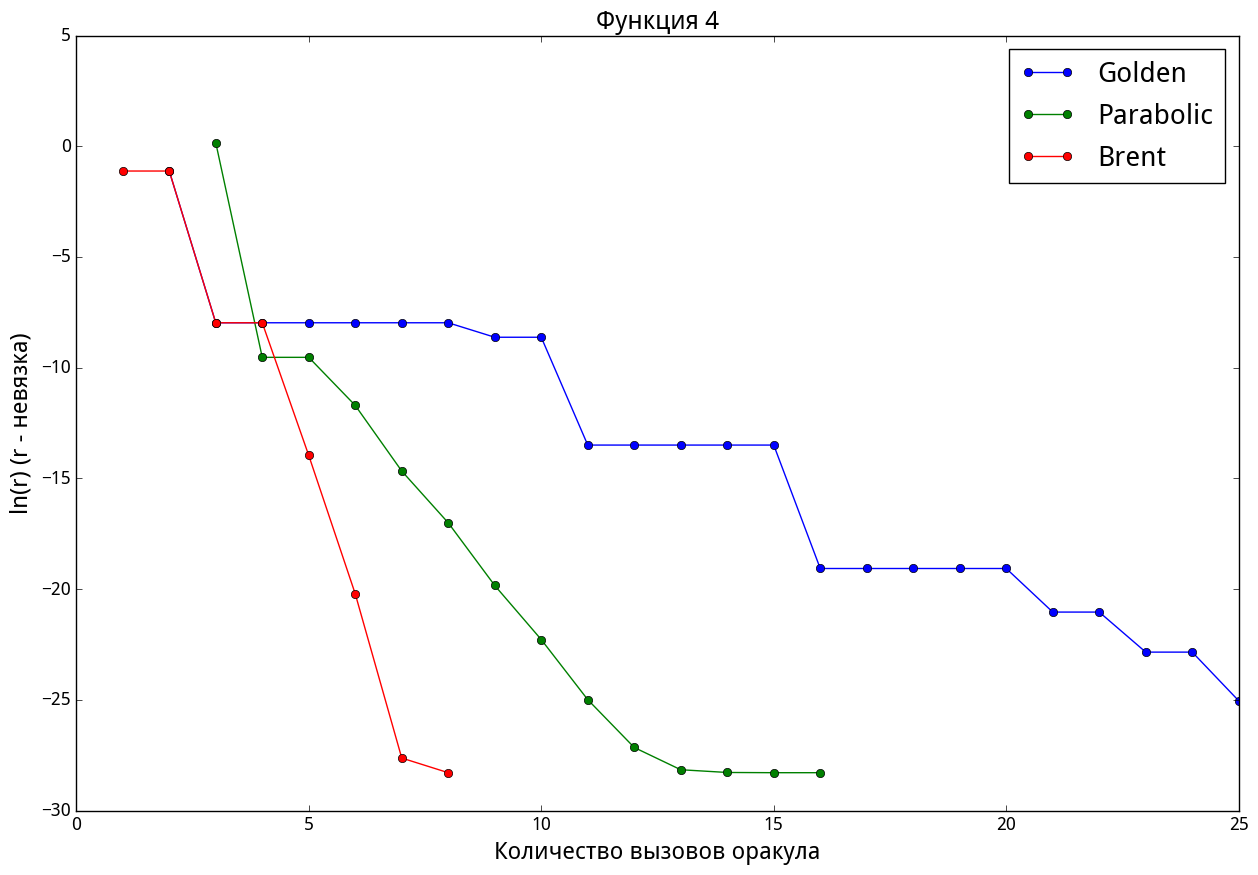

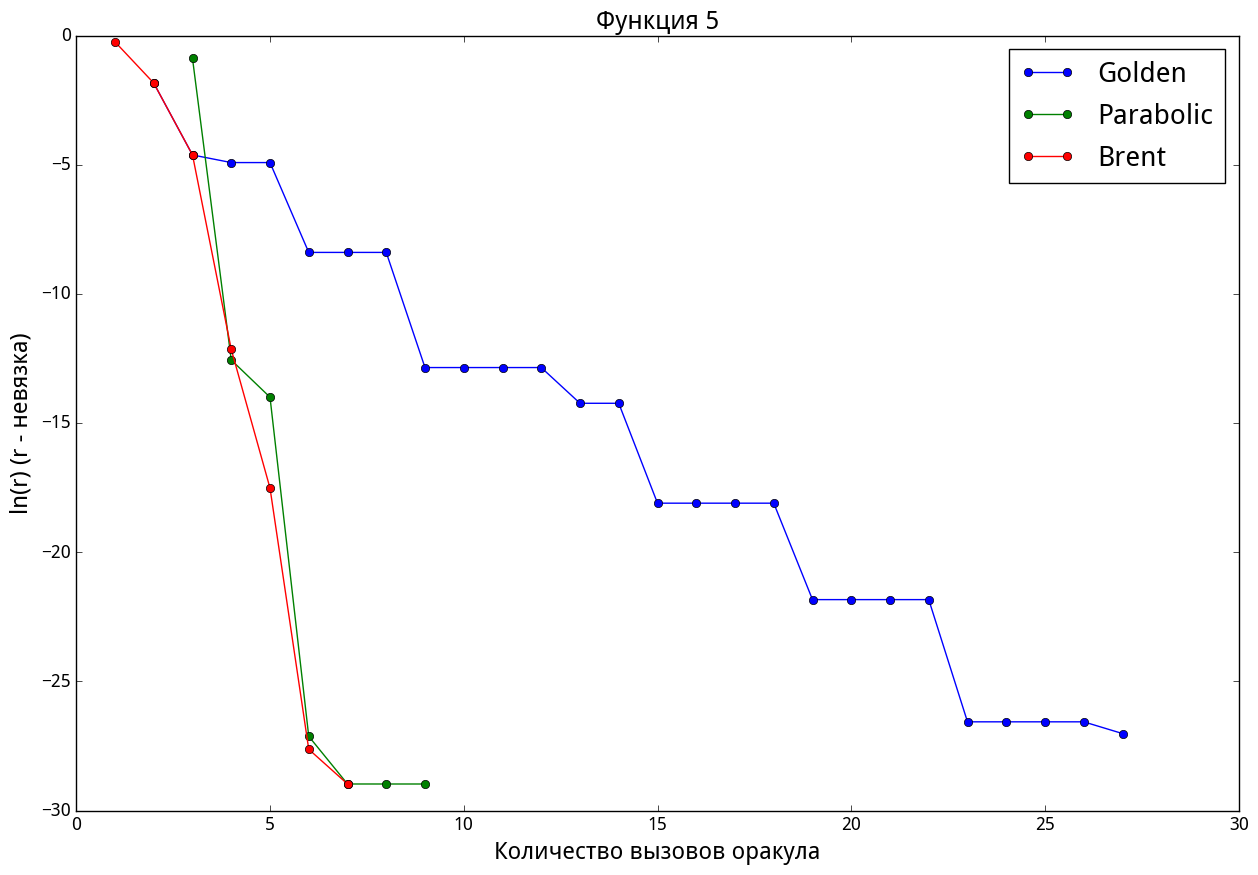

In [85]:
names = ['Golden', 'Parabolic', 'Brent']
for i, all_o in enumerate(my_optims):
    plt.figure(figsize=(15, 10))
    plt.title('Функция ' + str(i + 1), fontsize=18)
    for j, o in enumerate(all_o):
        plt.plot(o['n_evals'], np.log(np.fabs(o['f'] - optims[i] + 1e-12)), 'o-', label=names[j])
        plt.xlabel('Количество вызовов оракула', fontsize=17)
        plt.ylabel('ln(r) (r - невязка)', fontsize=17)
    plt.legend(loc='best', fontsize=20)
    plt.show()

In [86]:
my_optims_der = []
for i, p in enumerate(test.ans):
    mo = []
    
    tmp = optim1d.min_golden(test.fun[i], p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_parabolic(test.fun[i], p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_brent(test.fun[i], p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_secant(test.fun_der[i], p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    tmp = optim1d.min_brent_der(test.fun_der[i], p['a'], p['b'], trace=True)
    mo += [tmp[3]]
    
    my_optims_der.append(mo)

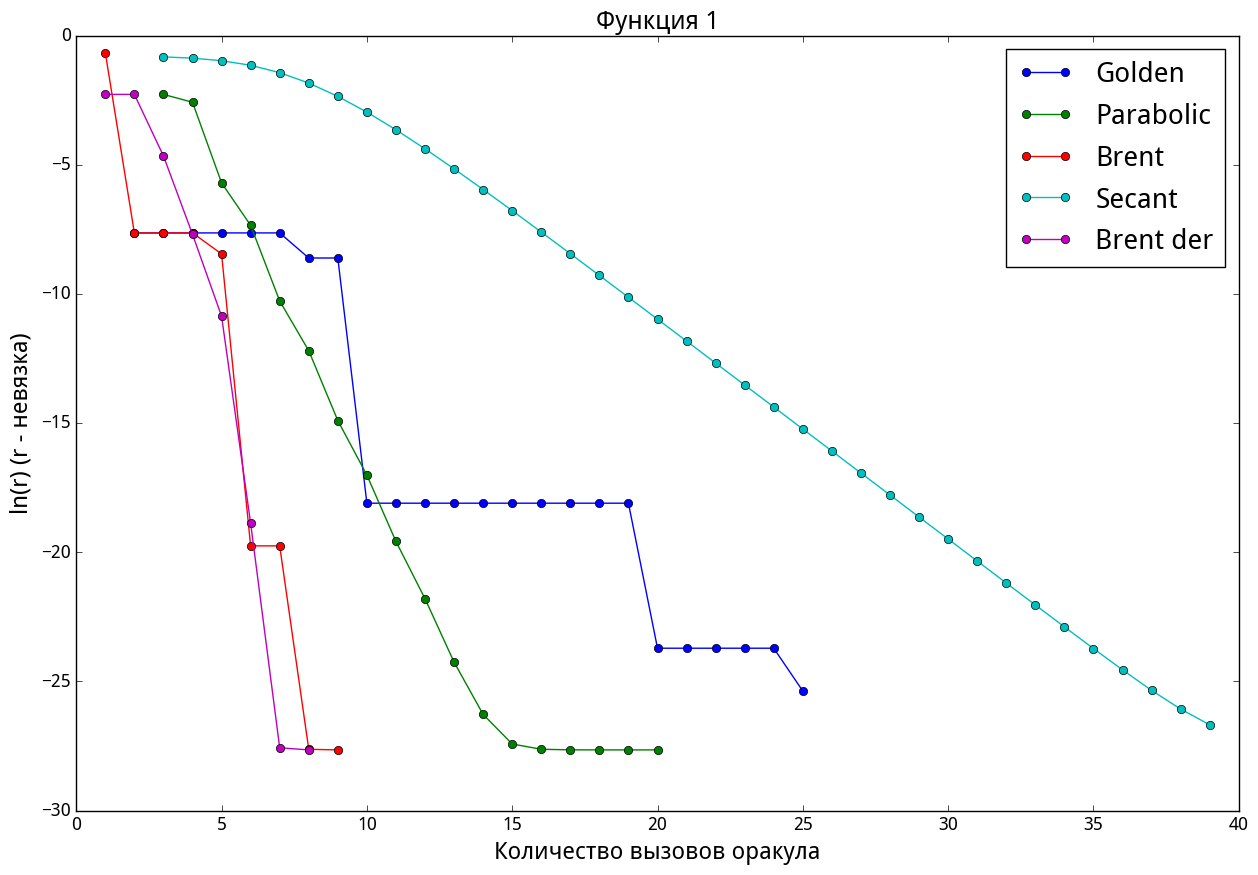

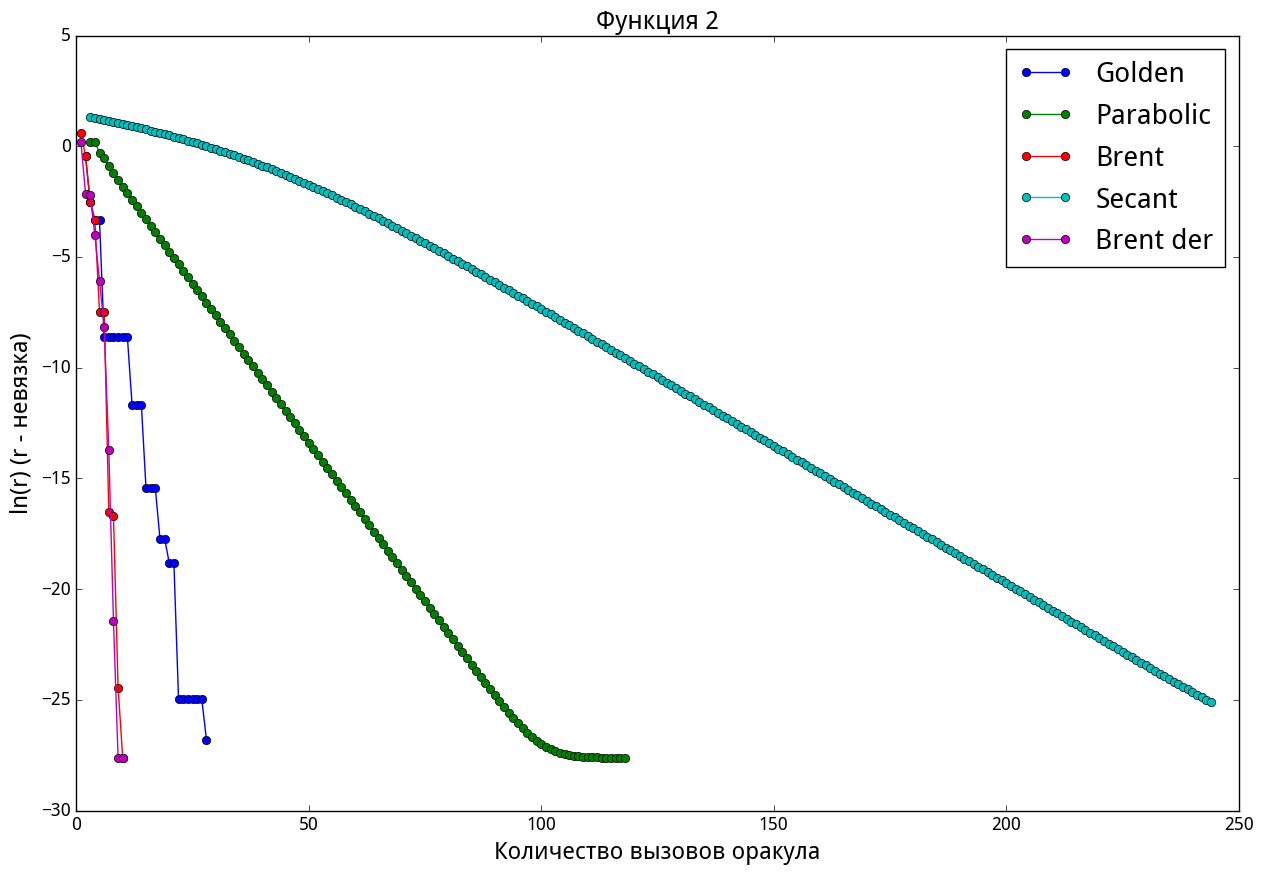

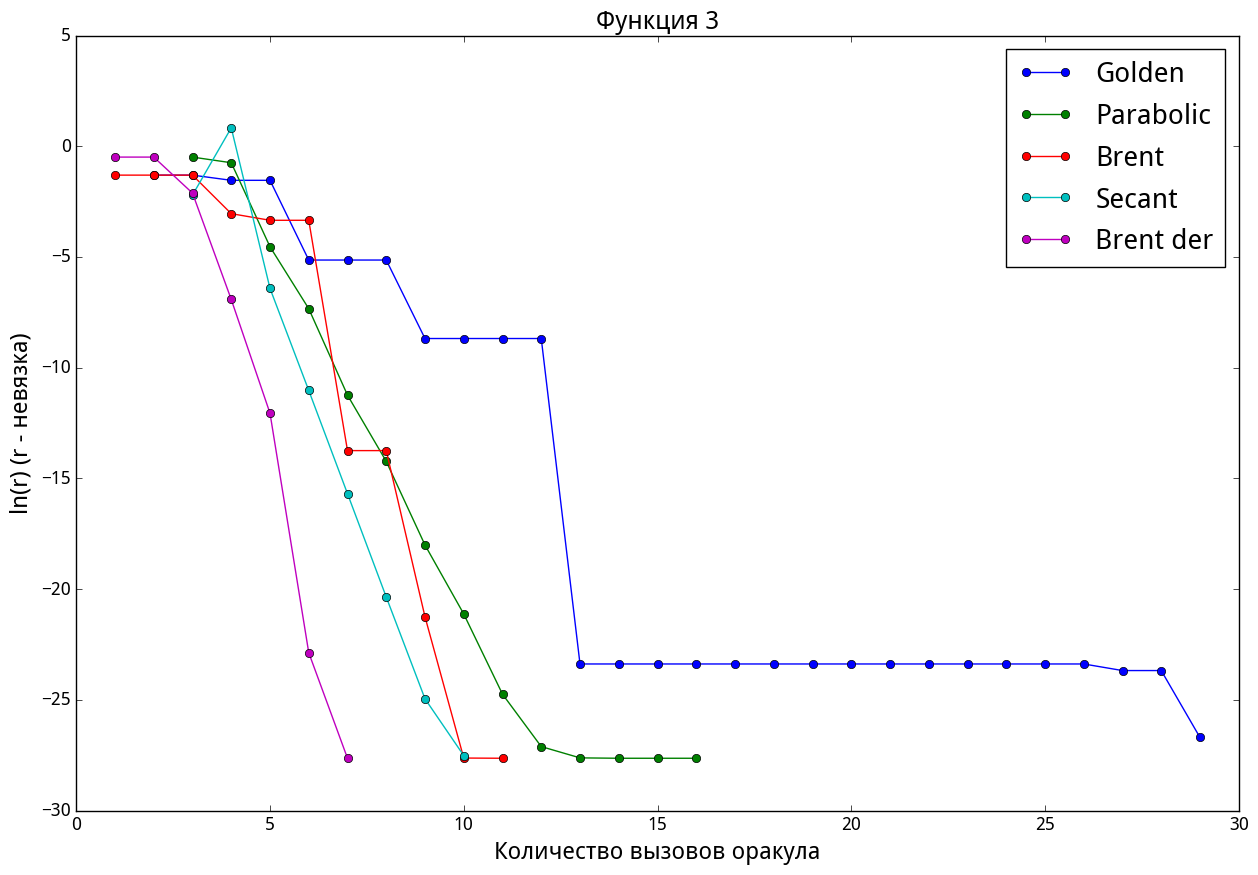

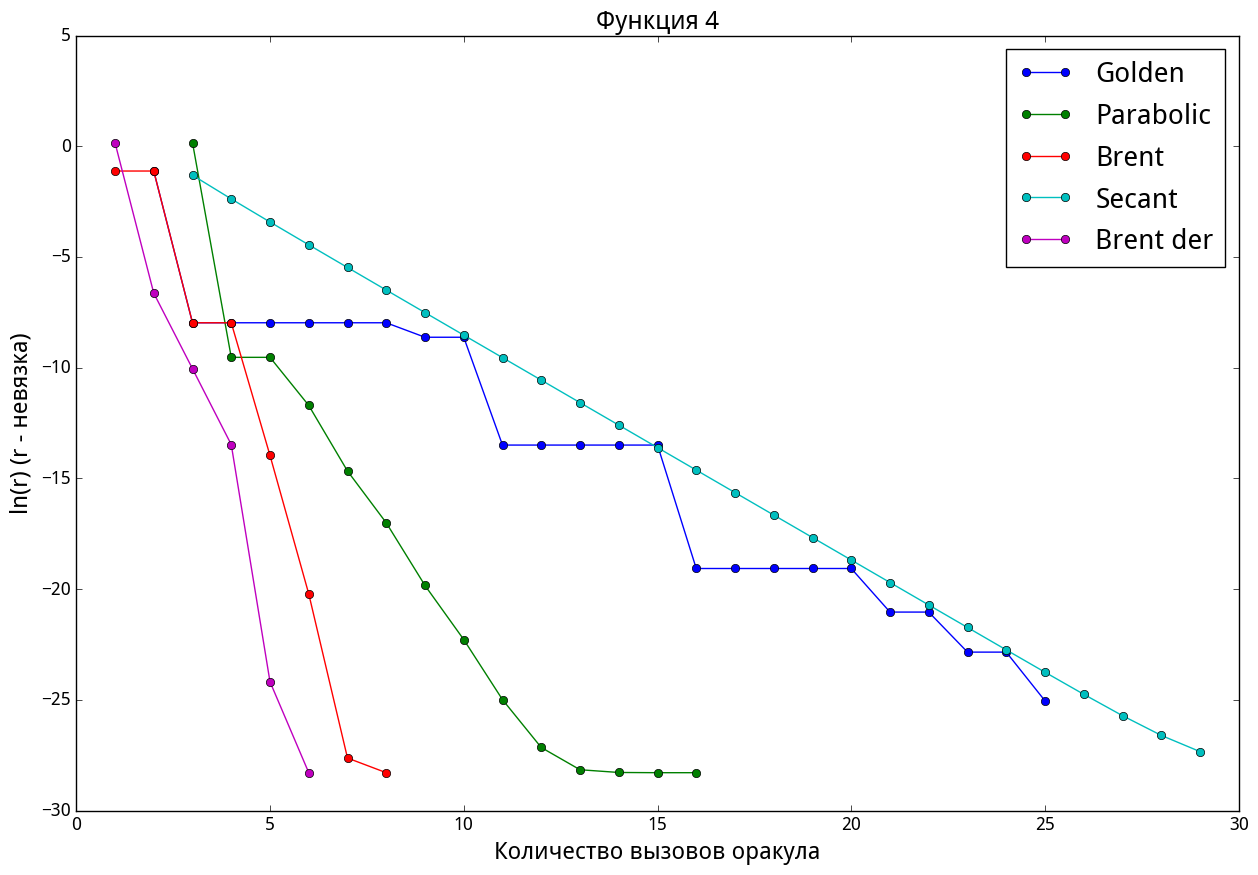

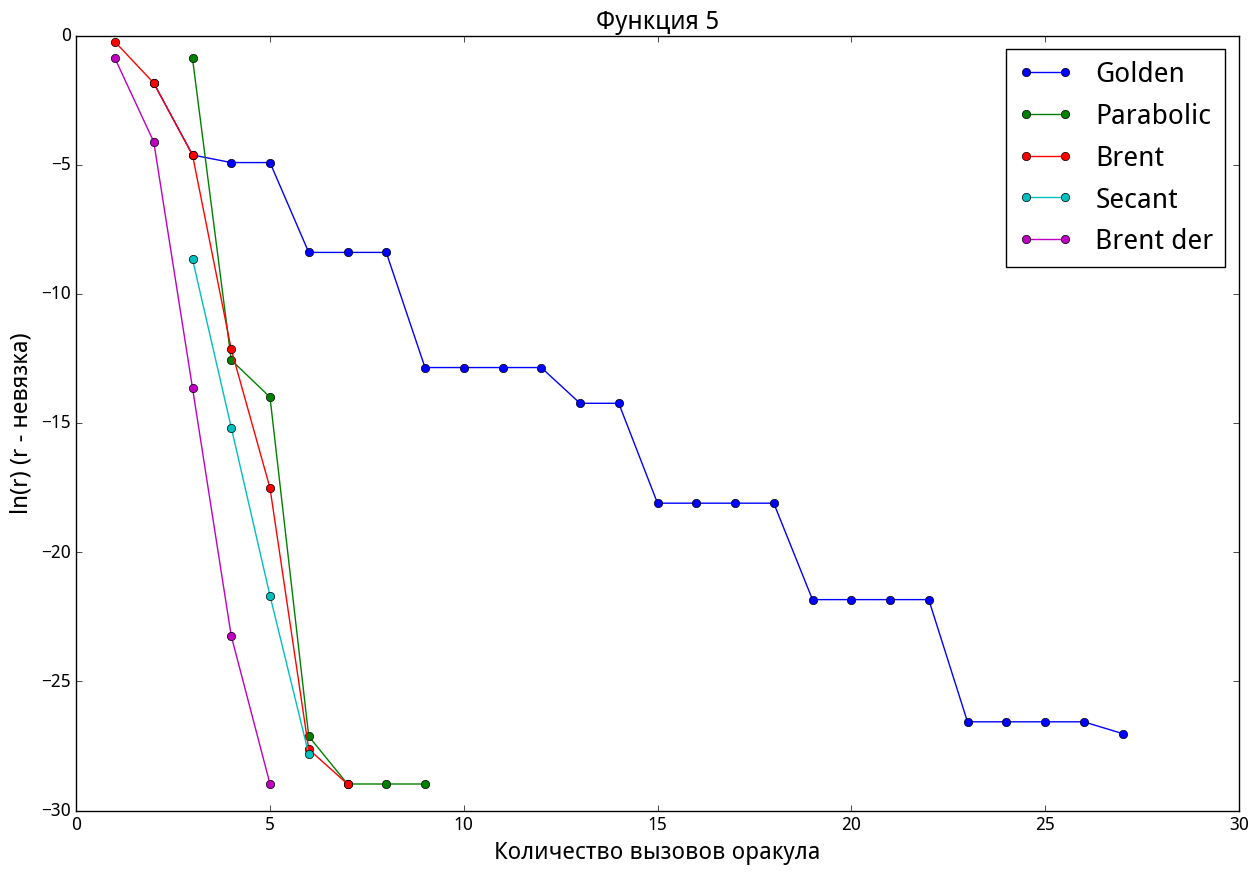

In [87]:
names = ['Golden', 'Parabolic', 'Brent', 'Secant', 'Brent der']
for i, all_o in enumerate(my_optims_der):
    plt.figure(figsize=(15, 10))
    plt.title('Функция ' + str(i + 1), fontsize=18)
    for j, o in enumerate(all_o):
        plt.plot(o['n_evals'], np.log(np.fabs(o['f'] - optims[i] + 1e-12)), 'o-', label=names[j])
        plt.xlabel('Количество вызовов оракула', fontsize=17)
        plt.ylabel('ln(r) (r - невязка)', fontsize=17)
    plt.legend(loc='best', fontsize=20)
    plt.show()

In [146]:
4 * np.pi

12.566370614359172

In [3]:
func = lambda x: np.sin(x)
a = np.pi
b = ((2 - 5 ** 0.5) * a + 4 * np.pi) / (3 - 5 ** 0.5)

In [6]:
b / np.pi

4.927050983124843

In [7]:
(a + b) / 2

9.310189913018583

In [160]:
x = np.linspace(a, b, 80)
names = ['Golden', 'Parabolic', 'Brent']
for i, min_f in enumerate([optim1d.min_golden, optim1d.min_parabolic, optim1d.min_brent]):
    res = min_f(func, a, b, trace=True)
    if i == 1:
        tmp = res
    plt.figure(figsize=(15, 7))
    plt.title(names[i] + " (" + str(res[3]['x'].size) + " итераций)", fontsize=18)
#     plt.xlim((a, b))
    plt.plot(x, func(x), label='sin(x)')
    plt.scatter(res[3]['x'][1:-1], res[3]['f'][1:-1], linewidths=0, label='Промежуточные точки')
    plt.scatter(res[3]['x'][0], res[3]['f'][0], c='r', s=150, linewidths=0, label='Стартовая точка')
    plt.scatter(res[3]['x'][-1], res[3]['f'][-1], c='g', s=70, linewidths=0, label='Ответ')
    plt.legend(loc='best', scatterpoints=1, fontsize=20)
    plt.show()

NameError: name 'func' is not defined

In [34]:
def func_sp(x):
    is_np = True
    if type(x) != np.ndarray:
        is_np = False
        x = np.array([x])
    
    y = np.zeros(x.size)
    ind = x < 0
    y[ind] = x[ind] ** 2
    
    ind = (0 <= x) * (x < 5)
    y[ind] = 0
    
    ind = x >= 5
    y[ind] = x[ind] ** 2 - 12 * x[ind] + 35
    
    return y if is_np else y[0]
    
a = -2
b = 8

iter. #1:	x= 4.180340,	f= 0.000000,	dist= 2.360680,	 method=golden
iter. #2:	x= 5.639320,	f=-0.869910,	dist= 1.458980,	 method=golden
iter. #3:	x= 5.639320,	f=-0.869910,	dist= 0.901699,	 method=golden
iter. #4:	x= 5.816069,	f=-0.966170,	dist= 0.176749,	 method=parabolic
iter. #5:	x= 6.000000,	f=-1.000000,	dist= 0.183931,	 method=parabolic
iter. #6:	x= 6.000000,	f=-1.000000,	dist= 0.000000,	 method=parabolic


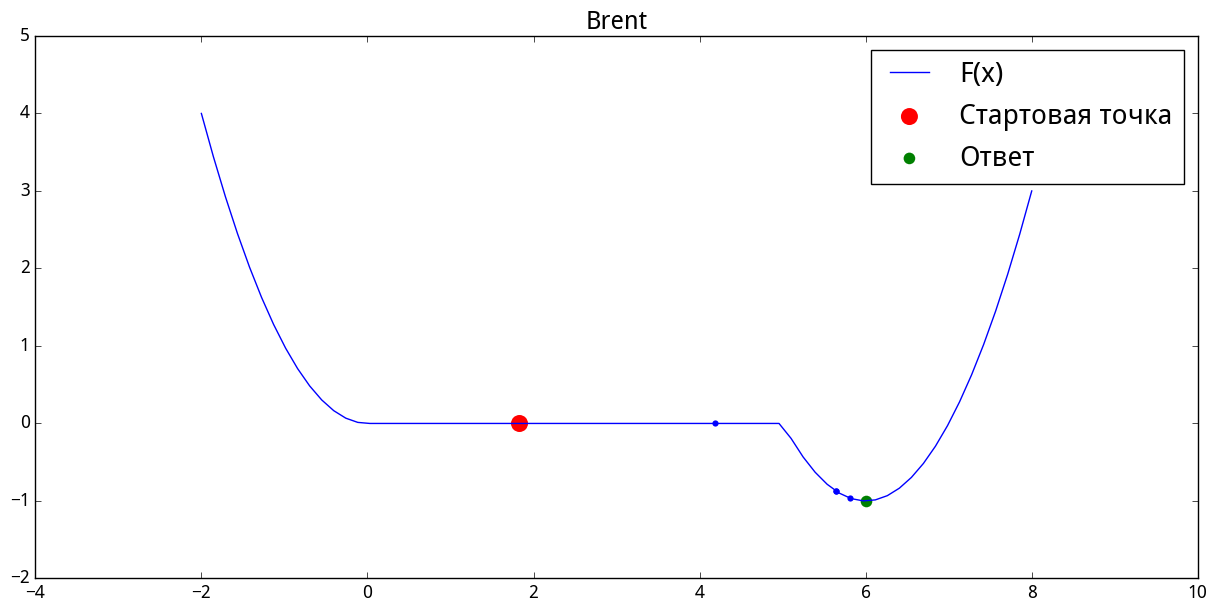

In [39]:
x = np.linspace(a, b, 70)
res = optim1d.min_brent(func_sp, a, b, trace=True, disp=True)
plt.figure(figsize=(15, 7))
plt.title("Brent", fontsize=18)
plt.plot(x, func_sp(x), label="F(x)")
plt.scatter(res[3]['x'][1:-1], res[3]['f'][1:-1], linewidths=0)
plt.scatter(res[3]['x'][0], res[3]['f'][0], c='r', s=150, linewidths=0, label='Стартовая точка')
plt.scatter(res[3]['x'][-1], res[3]['f'][-1], c='g', s=70, linewidths=0, label='Ответ')
    
plt.legend(loc='best', scatterpoints=1, fontsize=20)
plt.show()

$$f(x) = e^x - Cx, C > 0 $$

In [163]:
C = 100
np.log(C)

4.6051701859880918

In [198]:
func_sec = lambda x: (np.exp(x) - C * x, np.exp(x) - C)
a = -5
b = 12

In [199]:
res = optim1d.min_secant(func_sec, a, b, trace=True, tol=1e-5, max_iter=5000)

In [200]:
res[3]['x'].size

4850

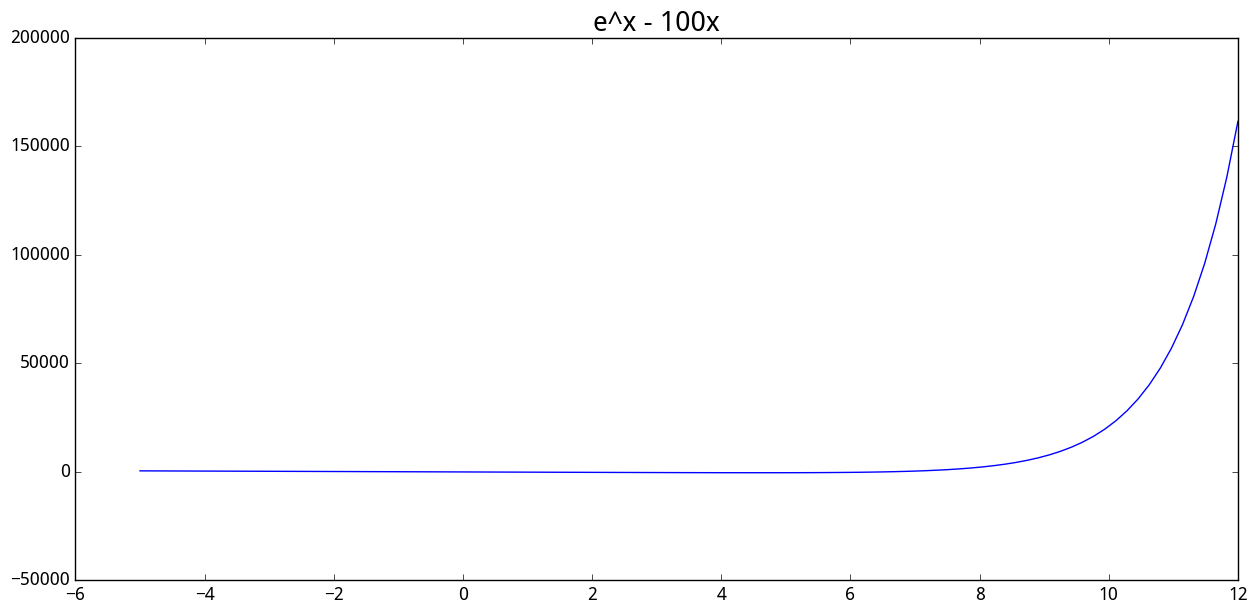

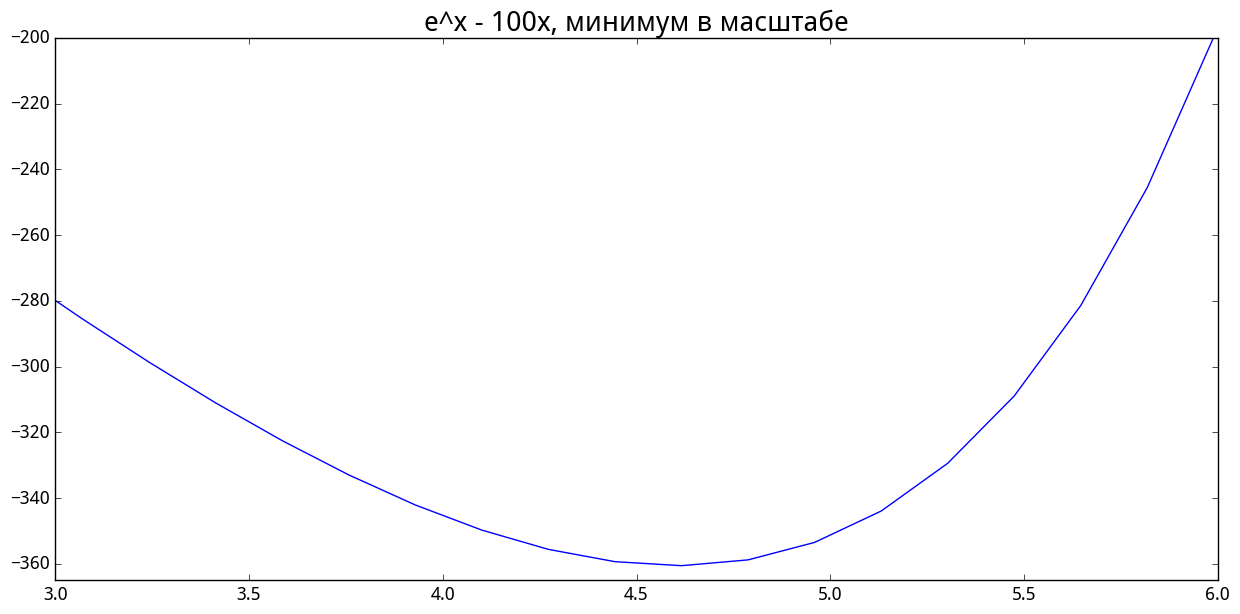

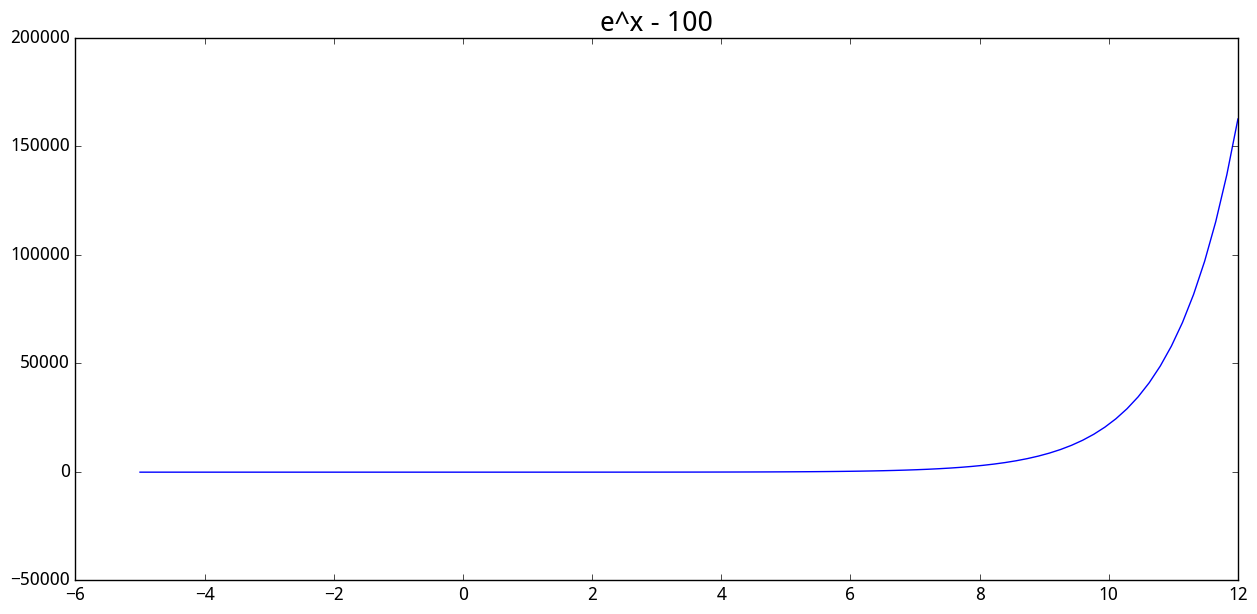

In [228]:
x = np.linspace(a, b, 100)
f_x = func_sec(x)
plt.figure(figsize=(15, 7))
plt.title("e^x - 100x", fontsize=20)
plt.plot(x, f_x[0])
plt.show()

plt.figure(figsize=(15, 7))
plt.title("e^x - 100x, минимум в масштабе", fontsize=20)
plt.xlim((3, 6))
plt.ylim((-365, -200))
plt.plot(x, f_x[0])
plt.show()

plt.figure(figsize=(15, 7))
plt.title("e^x - 100", fontsize=20)
plt.plot(x, f_x[1])
plt.show()

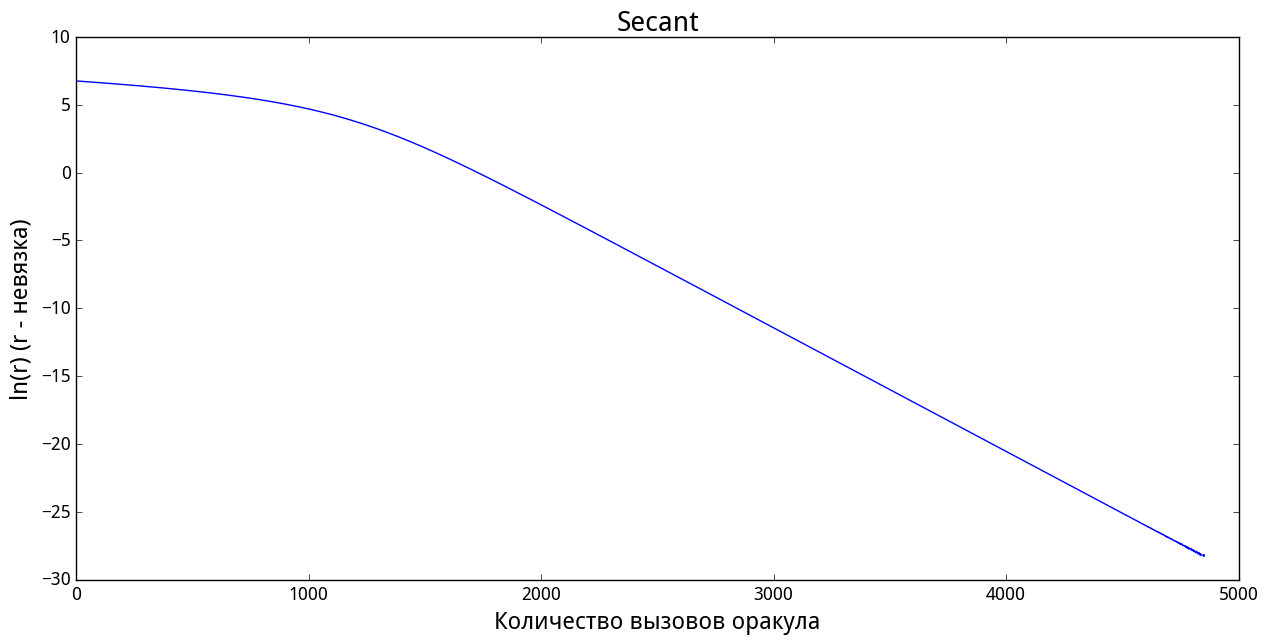

In [230]:
plt.figure(figsize=(15, 7))
plt.title("Secant", fontsize=20)
plt.xlabel('Количество вызовов оракула', fontsize=17)
plt.ylabel('ln(r) (r - невязка)', fontsize=17)
plt.plot(res[3]['n_evals'], np.log(res[3]['f'] - C * (1 - np.log(C))))